<a href="https://colab.research.google.com/github/econ105/AI/blob/main/ai_decision_making.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Strong AI: Use pre-trained LLM (closest approximation to strong AI today)

from transformers import pipeline


def strong_ai_decision(text_input):
    """Use a large language model for general decision-making"""
    nlp = pipeline("text-generation", model="gpt2")
    prompt = f"Question: {text_input}\nAnswer:"
    response = nlp(prompt, max_length=50, do_sample=False)[0]['generated_text']
    return response.split('Answer:')[-1].strip()

# Example: Complex ethical decision
question = "Should GenAI be banned in Hong Kong Shue Yan University's FinTech programme and why?"
response = strong_ai_decision(question)
print(f"Strong AI response:\n{response}")

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Strong AI response:
GenAI is a new technology that is being developed in China. It is a new technology that is being developed in China. It


<ipython-input-5-a245856b66b7>:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  stock_data['Signal'][long_window:] = np.where(
<ipython-input-5-a245856b66b7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

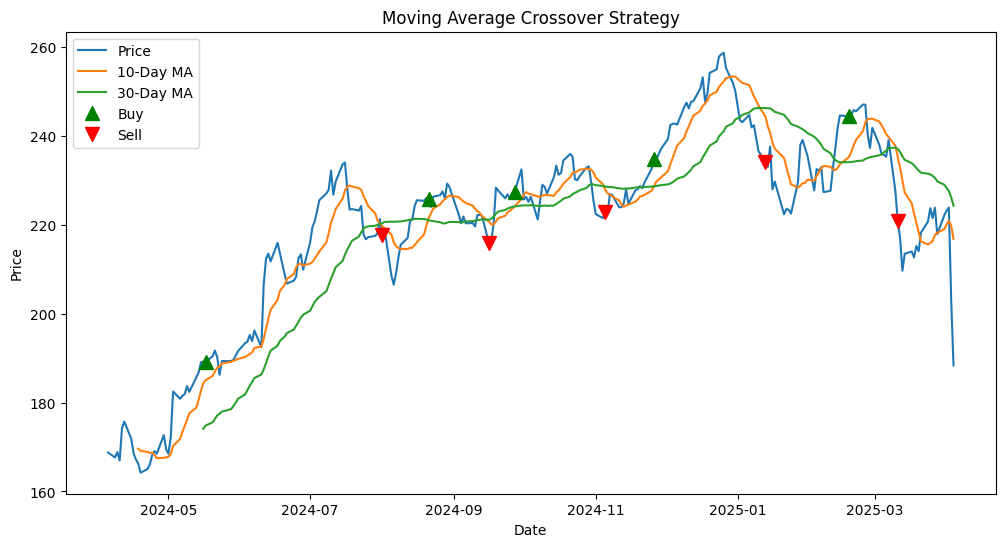

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def get_stock_data(ticker_symbol, period="1y"):
    ticker = yf.Ticker(ticker_symbol)
    data = ticker.history(period=period)
    return data


stock_data = get_stock_data("AAPL")

# short term long term MA
short_window = 10
long_window = 30

stock_data['Short_MA'] = stock_data['Close'].rolling(window=short_window).mean()
stock_data['Long_MA'] = stock_data['Close'].rolling(window=long_window).mean()

# trading signals
stock_data['Signal'] = 0
stock_data['Signal'][long_window:] = np.where(
    stock_data['Short_MA'][long_window:] > stock_data['Long_MA'][long_window:], 1, 0
)

# transaction points
stock_data['Position'] = stock_data['Signal'].diff()


plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Price')
plt.plot(stock_data['Short_MA'], label=f'{short_window}-Day MA')
plt.plot(stock_data['Long_MA'], label=f'{long_window}-Day MA')

# buying and selling point
plt.plot(stock_data[stock_data['Position'] == 1].index, stock_data['Close'][stock_data['Position'] == 1], '^', markersize=10, color='g', label='Buy')
plt.plot(stock_data[stock_data['Position'] == -1].index, stock_data['Close'][stock_data['Position'] == -1], 'v', markersize=10, color='r', label='Sell')

plt.title('Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Common Stock Tickers
AAPL: Apple Inc.
MSFT: Microsoft Corporation
GOOGL: Alphabet Inc. (Class A)
AMZN: Amazon.com, Inc.
FB: Meta Platforms, Inc. (formerly Facebook)
TSLA: Tesla, Inc.
NFLX: Netflix, Inc.
BRK.B: Berkshire Hathaway Inc. (Class B)
NVDA: NVIDIA Corporation
JPM: JPMorgan Chase & Co.
JNJ: Johnson & Johnson
V: Visa Inc.
PG: Procter & Gamble Co.
DIS: The Walt Disney Company
PYPL: PayPal Holdings, Inc.